# <h1 align = 'center'>Project Data collection, Transmission and Security part 2</h1> 
#### <center> Marvel VS DC   </center>
#### <center> Achraf BELLA </center>
#### <center> Ecole Centrale - Casablanca - January 2022 </center>
***

In [29]:
# importing necessary libraries
import pandas as pd
import numpy as np
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import json
import string
import re
 

# Data acquisition

In [2]:
def read_data(file):
    with open(file, 'r') as file:
        collected_tweets = file.readlines()
        pass
    return collected_tweets 

In [3]:
collected_tweets1 = read_data("DC_data_europe.txt")

let's check the structure of our tweet to build a function that collect only the valuable information.

In [4]:
pprint(json.loads(collected_tweets1[8]))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jan 20 17:07:45 +0000 2022',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1484211054154506255',
                        'indices': [117, 140],
                        'url': 'https://t.co/2GeUoQgmy7'}],
              'user_mentions': [{'id': 353718700,
                                 'id_str': '353718700',
                                 'indices': [0, 13],
                                 'name': 'Eaglemoss Collections',
                                 'screen_name': 'EaglemossLtd'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1484211054154506255,
 'id_str': '1484211054154506255',
 'in_reply_to_screen_name': 'EaglemossLtd',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 353718700,
 'in_reply_to_us

# Data transofrmation

In [5]:
def data_transorm(collected_tweets):
    """
    return a list of data 
    """
    
    data = list()
    for elm in collected_tweets:
        # format the str object into json format
        elm = json.loads(elm)
        # collect data and metadata
        tweet_date = elm['created_at']
        user_mentions = elm['entities']['user_mentions'] 
        lang = elm['lang']
        tweet = elm['text']
        user_name = elm['user']['screen_name']
        location = elm['user']['location']
        statuses_count = elm['user']['statuses_count']
        retweeted = elm['retweeted'] 
        verified_account = elm['user']['verified']
        followers = elm['user']['followers_count']
        friends_count = elm['user']['friends_count']
        data.append((tweet_date, user_mentions, lang, retweeted, tweet, user_name, location, 
                     statuses_count, followers, friends_count, verified_account))
        pass
    
    features = ['tweet_created', 'user_mentions', 'lang', 'retweeted','tweet', 'name', 'tweet_location', 'statuses_count',
            'followers','friends_count','verified_account'] 
    
    return pd.DataFrame(data, columns=features)

 We are going to use these features for our data

In [6]:
df = data_transorm(collected_tweets1)

In [7]:
df.head()

,tweet_created,user_mentions,lang,retweeted,tweet,name,tweet_location,statuses_count,followers,friends_count,verified_account
0,Thu Jan 20 18:36:28 +0000 2022,[],en,False,You know I am getting sick to absolute death o...,Dragonslay3r94,"London, United Kingdom",13991,450,1040,False
1,Thu Jan 20 18:29:10 +0000 2022,"[{'screen_name': 'DCBatman', 'name': 'Batman',...",en,False,@DCBatman Music Meister. Bring him into comics...,AzraelEnjoyer,Gotham,724,22,82,False
2,Thu Jan 20 18:00:46 +0000 2022,"[{'screen_name': 'KneelBeforeW13', 'name': 'MA...",en,False,@KneelBeforeW13 Dc is clear of marvel in anima...,roroillustrator,Deutschland,7607,1303,1085,False
3,Thu Jan 20 17:58:03 +0000 2022,[],en,False,JSA: 10 Best Comics Only True Fans Remember | ...,ComicsTweet1,Coventry,28636,1147,854,False
4,Thu Jan 20 17:49:23 +0000 2022,[],en,False,https://t.co/B0Ap2iB66B\nFunkos Popsies pop-up...,ComicsAndMovies,London,32636,8212,2361,False


# Data Analysis

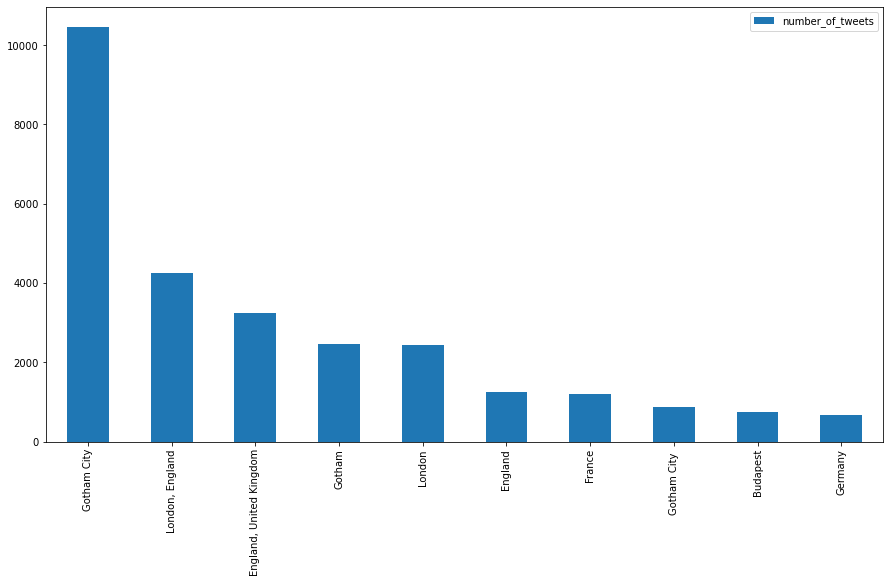

In [8]:
tweets_location = dict(df.tweet_location.value_counts())
# I will graph the 40 items because there are more relevant
df_tweets_location = pd.DataFrame(dict(list(tweets_location.items())[:10]), index=['number_of_tweets']).transpose()
df_tweets_location.plot.bar(figsize=(15, 8))
plt.xticks(rotation=90)
plt.show()

# DEA

In [9]:
df.shape

(52148, 11)

In [10]:
df.isnull().sum()

tweet_created       0
user_mentions       0
lang                0
retweeted           0
tweet               0
name                0
tweet_location      0
statuses_count      0
followers           0
friends_count       0
verified_account    0
dtype: int64

In [11]:
# we will build our corpus to performe some analysis
corpus = df.tweet

In [12]:
corpus_chars_list = "\n".join(corpus)

In [13]:
#a frequency distribution could be used to record the frequency of each word type in a document. 
#Formally, a frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.

fdist1 = FreqDist([c for c in corpus_chars_list])

In [14]:
print("number of characters:" + str(fdist1.N()))
print("number of unique characters:" + str(fdist1.B()))

number of characters:5996634
number of unique characters:485


In [15]:
u = list(fdist1.keys())
u.sort()
print('List of unique characters in the corpus:')
print(u)

List of unique characters in the corpus:
['\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\xa0', '£', '©', '«', '®', '´', '»', '¿', 'Â', 'É', '×', 'à', 'ä', 'ç', 'è', 'é', 'ë', 'í', 'ï', 'ñ', 'ó', 'ö', 'Ō', 'ซ', 'ท', 'อ', '\u200b', '\u200d', '–', '—', '‘', '’', '“', '”', '„', '•', '…', '\u202f', '‼', '⁉', '\u2060', '\u2066', '\u2069', '€', '₳', '⃣', '™', '↑', '⎜', 'ⓘ', '▶', '☄', '★', '☑', '☕', '☝', '☠', '☮', '☹', '☺', '♀', '♂', '♥', '♦', '♪', '♫', '♻', '⚘', '⚠', '⚡', '⚧', '⚪', '⚫', '⚽', '⛽', '✂', '✅', '✋', '✌', '✍', '✏', '✨', '❄', '❌', '❓', '❔', '❗', '❣', '❤', '➡', '⠀', '⤴

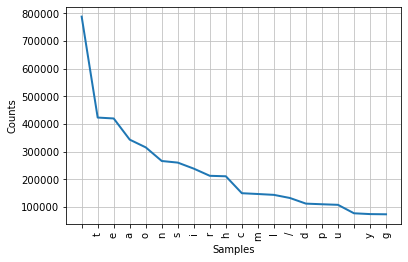

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
fdist1.plot(20, cumulative=False)

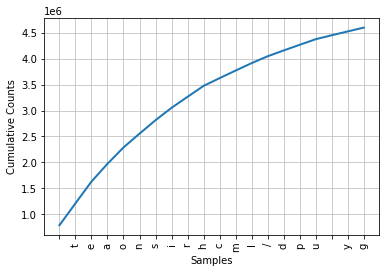

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [17]:
# the top 20 characters cover more than 95% of all character occurrences in the corpus
fdist1.plot(20,cumulative=True)

In [18]:
# the 10 most frequent characters in the corpus
fdist1.most_common(10)

[(' ', 787876),
 ('t', 422859),
 ('e', 419576),
 ('a', 343012),
 ('o', 315047),
 ('n', 265781),
 ('s', 259962),
 ('i', 238130),
 ('r', 212216),
 ('h', 210542)]

In [19]:
for c in ['.','!','?']:
    print(c,fdist1[c])

. 73026
! 8904
? 5546


We should delete them in data preparation.

In [20]:
L1 = [len(doc) for doc in df.tweet]
L2 = [len(sent_tokenize(doc)) for doc in df.tweet]
doc_len_df_ = pd.DataFrame({'n_chars' : L1, 'n_sents' : L2, \
                            'n_chars_per_sent' : np.array(L1)/np.array(L2)})
doc_len_df_.head()

,n_chars,n_sents,n_chars_per_sent
0,140,2,70.000000
1,89,3,29.666667
2,106,2,53.000000
3,95,1,95.000000
4,140,1,140.000000


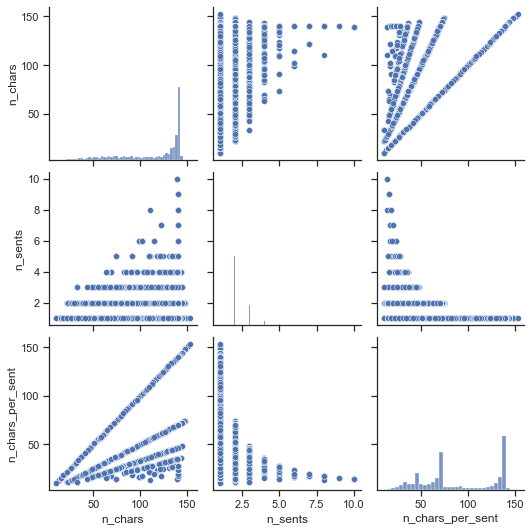

In [21]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(doc_len_df_)

# Data Preparation

Common data cleaning steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words
* Stemming / lemmatization

### Drop Duplicate Tweets

In [22]:
df.drop_duplicates(subset=['tweet'], inplace=True)

### Cleaning the data

In [23]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    '''Also for twitter we should delete RT at the beginning'''
    text = text.lower()
    text = re.sub('rt', '', text)
    text = re.sub('\n','', text)
    text = re.sub('\r','', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [24]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    return text

Pretty sure whenever something tweet about something, he may add some emojis that will ruin our analysis, and that excatly what we remarked there is so many emojis that we need to get ride of.

In [25]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [26]:
df['cleaned_tweet'] = df.tweet.apply(lambda x : clean_text_round1(x))
df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : clean_text_round2(x))

In [27]:
df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : remove_emojis(x))

### lemmatization

In [31]:
lemmatizer = WordNetLemmatizer() 
stemmer = SnowballStemmer('english')
df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : stemmer.stem(WordNetLemmatizer().lemmatize(x, pos='v')))

### break the tweets into tokens

In [32]:
df['tokens'] = df.cleaned_tweet.apply(lambda x : x.split(' '))

### stop words

In [33]:
final_stopwords_list = stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in final_stopwords_list and len(item)> 3])

In [34]:
df['cleaned_tweet'] = df['tokens'].apply(lambda x: ' '.join([item for item in x]))

# Analysis after the cleansing

In [35]:
corpus_ = df.cleaned_tweet

In [36]:
corpus_chars_list_ = "\n".join(corpus_)

In [37]:
fdist1_ = FreqDist([c for c in corpus_chars_list_])

In [38]:
u_ = list(fdist1_.keys())
u_.sort()
print('List of unique characters in the corpus:')
print(u_)

List of unique characters in the corpus:
['\n', ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '£', '©', '«', '®', '´', '»', '¿', '×', 'ä', 'ç', 'è', 'é', 'ë', 'í', 'ï', 'ñ', 'ó', 'ö', 'ō', 'ซ', 'ท', 'อ', '\u200b', '–', '—', '„', '•', '\u202f', '⁉', '\u2060', '\u2066', '\u2069', '⃣', '™', '↑']


Now we have a more clean data

# Pipeline

In [39]:
def Pipeline(file):
    list_data = read_data(file)
    # convert list to dataframe
    df        = data_transorm(list_data)
    # drop duplictes
    df.drop_duplicates(subset=['tweet'], inplace=True)
    # clean 1 
    df['cleaned_tweet'] = df.tweet.apply(lambda x : clean_text_round1(x))
    # clean 2
    df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : clean_text_round2(x))
    # remove emojis
    df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : remove_emojis(x))
    # lemmatization
    df['cleaned_tweet'] = df.cleaned_tweet.apply(lambda x : stemmer.stem(WordNetLemmatizer().lemmatize(x, pos='v'))) 
    # tokens
    df['tokens'] = df.cleaned_tweet.apply(lambda x : x.split(' '))
    # stop words
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in final_stopwords_list and len(item)>=3])
    # clean text
    df['cleaned_tweet'] = df['tokens'].apply(lambda x: ' '.join([item for item in x]))
    # save df as pickle
    df.to_pickle(str(file[:-4])+"_df.pkl")

In [40]:
for data_path in ['DC_data_europe.txt', 'DC_data_usa.txt', 'marvel_data_usa.txt', 'marvel_data_europe.txt']:
    print("the {} in the pipline".format(data_path))
    Pipeline(data_path)
    pass
pass 

the DC_data_europe.txt in the pipline
the DC_data_usa.txt in the pipline
the marvel_data_usa.txt in the pipline
the marvel_data_europe.txt in the pipline
